# Pendule de Foucault (simulations numériques en Python)

## Mise en équation

### Les notations
On note $\vec{p}$ la position de la masse $m$ suspendue à un fil de longueur $l$, $\vec{v}$ sa vitesse et $\vec{a}$ son accélération, définis dans un repère orthonormé $(\begin{matrix}\vec{u}_x&\vec{u}_y&\vec{u}_z\end{matrix})$. Le vecteur $\vec{u}_z$ pointe vers le zénith, $\vec{u}_x$ vers le nord et $\vec{u}_y$ vers l'ouest.
### Principe fondamental de la dynamique
Bilan des forces, avec la tension $\vec{T}$ du fil, colinéaire à ce fil :
$$\vec{T}+m\vec{\gamma}=m\vec{a}$$
Prise en compte de la pesanteur avec $g=9,81 m/s^2$ (accélération due à la gravitation et à la force d’inertie centrifuge) et de l'accélération due à force de Coriolis.
$$\vec{\gamma}=\left(\begin{matrix}\gamma_x\\\gamma_y\\\gamma_z\end{matrix}\right)=\left(\begin{matrix}0\\0\\-g\end{matrix}\right)-2\vec{\Omega}_T\wedge\vec{v}$$
### Equation dynamique
Au final, on détermine complètement le mouvement avec les coordonnées $x$ et $y$ de la masse suspendue. La coordonnée $z$ et sa dérivée première $\dot{z}$ sont implicitement connues. On a $z=-\sqrt{l^2-x^2-y^2}$, puis $\dot{z}=-\frac{x\dot{x}+y\dot{y}}{z}$, et enfin $v^2=\dot{x}^2+\dot{y}^2+\dot{z}^2$.

L'équation dynamique avec l'état $(\begin{matrix}x&y&\dot{x}&\dot{y}\end{matrix})$ est alors :
\begin{align}
l^2\ddot{x}&=-xy\gamma_y-xz\gamma_z+(l^2-x^2)\gamma_x-xv^2\\
l^2\ddot{y}&=-yx\gamma_x-yz\gamma_z+(l^2-y^2)\gamma_y-yv^2
\end{align}

## Code initial à exécuter avant de lancer les fonctions (fichier **pend_v2.py**)

In [ ]:
# -*- coding: utf-8 -*-
"""
pend_v2

Liste des fonctions :
--------------------
rk4(f,t,y0)
rk8(f,t,y0)
equ_dyn_pendule(y,l,g,Omega)
pf_sim(l=30,g=9.81,OT=7.292115e-5,Lat=45,
    R=3,V=0,Dir=0,
    Duree=3600,Pas=0.02,methode='rk4')
--------------------
@author KM (07/08/2023)
"""

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.linear_model import LinearRegression

# Méthode générique de résolution numérique d'équation différentielle ordinaire
# y'=f(t,y)
# (Runge-Kutta d'ordre 4)
# La fonction f est de la forme f(t,y)
# t est une liste d'instants sur lesquels s'effectue la résolution
# y0 est la condition initiale
def rk4(f,t,y0):
    y=np.zeros((len(t),len(y0)))
    k1=np.zeros(len(y0));k2=np.copy(k1);k3=np.copy(k1);k4=np.copy(k1)
    y[0,:]=y0[:]
    for n in np.arange(1,len(t)):
        yprec=y[n-1];tprec=t[n-1]
        h=t[n]-tprec
        k1[:]=f(tprec,yprec)
        k2[:]=f(tprec+h/2,yprec+(h/2)*k1)
        k3[:]=f(tprec+h/2,yprec+(h/2)*k2)
        k4[:]=f(tprec+h,yprec+h*k3)
        y[n,:]=yprec+(h/6)*(k1+2*k2+2*k3+k4)
    return t,y

# Méthode générique de résolution numérique d'équation différentielle ordinaire
# y'=f(t,y)
# (Runge-Kutta d'ordre 8)
# La fonction f est de la forme f(t,y)
# t est une liste d'instants sur lesquels s'effectue la résolution
# y0 est la condition initiale
def rk8(f,t,y0):
    y=np.zeros((len(t),len(y0)))
    k1=np.zeros(len(y0));k2=np.copy(k1);k3=np.copy(k1);k4=np.copy(k1);k5=np.copy(k1)
    k6=np.zeros(len(y0));k7=np.copy(k1);k8=np.copy(k1);k9=np.copy(k1);k10=np.copy(k1)
    y[0,:]=y0[:]
    for n in np.arange(1,len(t)):
        yprec=y[n-1];tprec=t[n-1]
        h=t[n]-tprec
        k1[:] =f(tprec,yprec)
        k2[:] =f(tprec+h*(4/27),yprec+(h*4/27)*k1)
        k3[:] =f(tprec+h*(2/9) ,yprec+(h/18)*(k1+3*k2))
        k4[:] =f(tprec+h*(1/3) ,yprec+(h/12)*(k1+3*k3))
        k5[:] =f(tprec+h*(1/2) ,yprec+(h/8)*(k1+3*k4))
        k6[:] =f(tprec+h*(2/3) ,yprec+(h/54)*(13*k1-27*k3+42*k4+8*k5))
        k7[:] =f(tprec+h*(1/6) ,yprec+(h/4320)*(389*k1-54*k3+966*k4-824*k5+243*k6))
        k8[:] =f(tprec+h       ,yprec+(h/20)*(-231*k1+81*k3-1164*k4+656*k5-122*k6+800*k7))
        k9[:] =f(tprec+h*(5/6) ,yprec+(h/288)*(-127*k1+18*k3-678*k4+456*k5-9*k6+576*k7+4*k8))
        k10[:]=f(tprec+h       ,yprec+(h/820)*(1481*k1-81*k3+7104*k4-3376*k5+72*k6-5040*k7-60*k8+720*k9))
        y[n,:]=yprec+(h/840)*(41*k1+27*k4+272*k5+27*k6+216*k7+216*k9+41*k10)
    return t,y

# La fonction "f(t,y)" pour le problème posé
def equ_dyn_pendule(y,l,g,Omega):
    yp=np.zeros(4)
    X=y[0];Y=y[1];Xp=y[2];Yp=y[3]
    Z=-np.sqrt(l**2-X**2-Y**2)
    Zp=-(X*Xp+Y*Yp)/Z;V2=Xp**2+Yp**2+Zp**2;V=[Xp,Yp,Zp]
    gamma=[0,0,-g]-2*np.cross(Omega,V);
    yp[0:2]=[Xp,Yp];
    yp[2:4]=[
    (-X*Y*gamma[1]-X*Z*gamma[2]+(l**2-X**2)*gamma[0]-X*V2)/(l**2),
    (-Y*X*gamma[0]-Y*Z*gamma[2]+(l**2-Y**2)*gamma[1]-Y*V2)/(l**2)
    ]
    return yp

# La fonction pf_sim pour lancer la simulation
# l : longueur du pendule en m
# g : accélération de la pesanteur en m/s^2
# OT : vitesse de rotation de la Terre en rd/s
# Lat : latitude de l'observateur en degré
# R : écart par rapport à la verticale en m
# V : vitesse initiale latérale en m/s
# Dir : direction vers laquelle on effectue l'écart en degré
# Duree : durée de la simulation en secondes
# Pas : pas de calcul en secondes
# methode : méthode d'intégration choisie 'rk4' ou 'rk8'
def pf_sim(l=30,g=9.81,OT=7.292115e-5,Lat=45,
    R=3,V=0,Dir=0,
    Duree=3600,Pas=0.02,methode='rk4'):
    # Choix de la méthode d'intégration numérique
    if methode=='rk4':
        meth=rk4
    if methode=='rk8':
        meth=rk8
    # Coordonnées du vecteur rotation dans le référentiel de l'observateur
    Omega=[OT*np.cos(Lat*np.pi/180.0),0,OT*np.sin(Lat*np.pi/180.0)]
    # Coordonnées du point de départ et de la vitesse initiale
    # dans le référentiel de l'observateur (conditions initiales)
    y0=[R*np.cos(Dir*np.pi/180.0),R*np.sin(Dir*np.pi/180.0),
    -V*np.sin(Dir*np.pi/180.0),V*np.cos(Dir*np.pi/180.0)]
    # Tableau des instants de calcul pour la simulation
    t_cal=np.arange(0,Duree+Pas,Pas)
    # Lancement de la simulation numérique
    print('début de la simulation numérique')
    start=datetime.now()
    _,y=meth(lambda t,y : equ_dyn_pendule(y,l,g,Omega),t_cal,y0)
    end=datetime.now()
    print(f'fin de la simulation à {end - start} (hh:mm:ss.ms)')

    # Tracé de l'extrémité du pendule en 3D
    X=y[:,0];Y=y[:,1];Z=-np.sqrt(l**2-X**2-Y**2)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(X, Y, Z,'b',linewidth=1)
    ax.scatter(0,0,0,c='r')
    ax.scatter(X[0],Y[0],Z[0],c='g')
    ax.set_xlabel('X (en m) Sud-->Nord'),ax.set_ylabel('Y (en m)  Est-->Ouest'),ax.set_zlabel('Z (en m) Nadir-->Zénith')
    ax.axes.set_xlim3d(left=-l, right=l)
    ax.axes.set_ylim3d(bottom=-l, top=l)
    ax.axes.set_zlim3d(bottom=-l, top=l/2)

    # Tracé de la variation relative de l'énergie totale
    # (énergie cinétique plus énergie potentielle)
    # qui devrait rester constante
    Xp=y[:,2];Yp=y[:,3];Zp=-(X*Xp+Y*Yp)/Z
    eT=(Xp**2+Yp**2+Zp**2)/2+g*Z
    plt.figure()
    plt.plot(t_cal,(eT-eT[0])/eT[0],'b',linewidth=1)
    plt.grid('on')
    plt.title('Variation relative de l\'énergie totale')
    plt.xlabel('temps (en s)')

    # Tracé de l'extrémité du pendule en 2D (plan horizontal)
    plt.figure()
    plt.plot(X,Y,'b',linewidth=1),
    plt.plot(X[0],Y[0],'og')
    plt.grid('on')
    plt.xlabel('X (en m) Sud-->Nord')
    plt.ylabel('Y (en m) Est-->Ouest')
    plt.title('Position de l\'extrémité du pendule')
    plt.axis('equal')

    # Estimation de l'angle de précession
    # Calcul de l'angle de déviation du pendule
    theta=180.0*np.arcsin(np.sqrt(X**2+Y**2)/l)/np.pi
    # Recherche des maxima locaux
    wq=int((0.75*np.pi*np.sqrt(l/g))/Pas)
    local_max=np.array([max(theta[n-wq:n+wq+1]) for n in range(wq,len(theta)-wq)])
    top=np.where(theta[wq:len(theta)-wq]==local_max)[0]+wq
    # Retrait des maxima redondants
    top_eff=[]
    for n in range(1,len(top)):
        if top[n]-top[n-1]<wq:
            top_eff.append(n)
    top=np.delete(top,top_eff)
    # On sélectionne un maximum local sur deux pour délimiter une période complète
    top=top[1::2]
    # Calcul de l'angle de précession pour chaque période
    angle=180.0*np.unwrap(np.arctan2(Y[top],X[top]))/np.pi
    temps=t_cal[top]

    plt.figure()
    plt.plot(t_cal,theta,'r',linewidth=1,label='angle de déviation du pendule')
    plt.plot(t_cal[top],theta[top],'go',linewidth=1,label='maxima détectés')
    plt.plot(t_cal[wq:len(theta)-wq],local_max,'k',linewidth=1,label='valeurs maximales dans une fenêtre glissante')
    plt.grid('on')
    plt.title('Détection des périodes d\'oscillation')
    plt.xlabel('temps (en s)')
    plt.ylabel('angle (en °)')
    plt.legend()

    plt.figure()
    plt.plot(t_cal,180.0*np.arctan2(Y,X)/np.pi,'b',linewidth=1,label='angle du vecteur position')
    plt.plot(temps,angle,'go',linewidth=1,label='valeurs aux maxima de l\'angle de déviation')
    plt.grid('on')
    plt.title('Evaluation de l\'angle de précession')
    plt.xlabel('temps (en s)')
    plt.ylabel('angle (en °)')
    plt.legend()

    reg = LinearRegression().fit(temps.reshape((-1, 1)), angle)
    vitesse_p_mes=3600.0*reg.coef_[0]
    vitesse_p_cal_coriolis=-3600.0*(180.0*OT/np.pi)*np.sin(np.pi*Lat/180.0)
    vitesse_p_cal_puiseux=3600.0*180.0*((3.0/(8.0*l**2))*R*V)/np.pi
    V_comp=OT*np.sin(np.pi*Lat/180.0)/((3.0/(8.0*l**2))*R)
    periode_mes=(t_cal[top[-1]]-t_cal[top[0]])/(len(top)-1)
    periode_cal=2.0*np.pi*np.sqrt(l/g)

    plt.figure()
    plt.plot(temps,angle,'r.-',linewidth=1,label='mesure intantanée')
    plt.plot(t_cal,reg.predict(t_cal.reshape((-1, 1))),'b',linewidth=1,label='régression linéaire')
    plt.grid('on')
    plt.title(f'Angle de précession mesuré ({vitesse_p_mes:.3f} °/h)')
    plt.xlabel('temps (en s)')
    plt.ylabel('angle (en °)')
    plt.legend()

    fig, ax = plt.subplots()
    ax.set_title('Paramètres et résultats')

    ax.add_patch(Rectangle((0.0,0.48),1.0,0.52,facecolor='blue',alpha=0.5))
    ax.text(0.95,0.74,'Paramètres',rotation='vertical',fontweight='bold',verticalalignment='center')
    ax.text(0.02,0.95,f'Longueur du pendule : l={l:.3f} m')
    ax.text(0.02,0.90,f'Accélération de la pesanteur : g={g:.3f} m/s^2')
    ax.text(0.02,0.85,f'Vitesse de rotation de la Terre : OT={3600*180*OT/np.pi:.3f} °/h')
    ax.text(0.02,0.80,f'Latitude : Lat={Lat:.3f} °')
    ax.text(0.02,0.75,f'Ecart position (plan horizontal) : R={R:.3f} m')
    ax.text(0.02,0.70,f'Ecart vitesse latérale : V={100.0*V:.3f} cm/s')
    ax.text(0.02,0.65,f'Direction de l\'écart (0° cap nord) : Dir={Dir:.3f} °')
    ax.text(0.02,0.60,f'Durée de la simulation : Duree={Duree:.3f} s')
    ax.text(0.02,0.55,f'Pas de temps : Pas={Pas:.3f} s')
    ax.text(0.02,0.50,f'Méthode d\'intégration numérique : methode={methode}')

    ax.add_patch(Rectangle((0.0,0.03),1.0,0.42,facecolor='green',alpha=0.5))
    ax.text(0.95,0.24,'Résultats',rotation='vertical',fontweight='bold',verticalalignment='center')
    ax.text(0.02,0.40,f'Erreur relative max sur l\'énergie totale : {max(np.absolute((eT-eT[0])/eT[0])):.3e}')
    ax.text(0.02,0.35,f'Vitesse de précession mesurée : {vitesse_p_mes:.3f} °/h')
    ax.text(0.02,0.30,f'Vitesse de précession calculée (Coriolis) : {vitesse_p_cal_coriolis:.3f} °/h')
    ax.text(0.02,0.25,f'Vitesse de précession calculée (Puiseux) : {vitesse_p_cal_puiseux:.3f} °/h')
    ax.text(0.02,0.20,f'Vitesse latérale annulant la précession : {100.0*V_comp:.3f} cm/s')
    ax.text(0.02,0.15,f'Période mesurée : {periode_mes:.3f} s')
    ax.text(0.02,0.10,f'Période calculée : {periode_cal:.3f} s')
    ax.text(0.02,0.05,f'Nombre d\'oscillations : {len(top)-1:d}')

    ax.axis('off')

    plt.show()

## Utilisation des fonctions

### Simulation numérique sur une durée courte pour mettre en évidence l'effet Puiseux

début de la simulation numérique
fin de la simulation à 0:00:02.824406 (hh:mm:ss.ms)


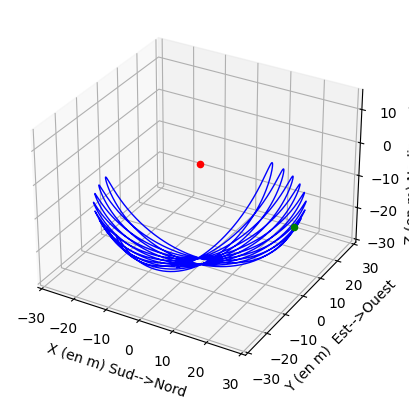

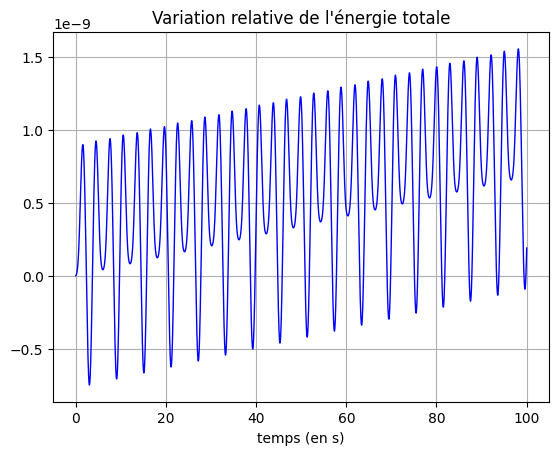

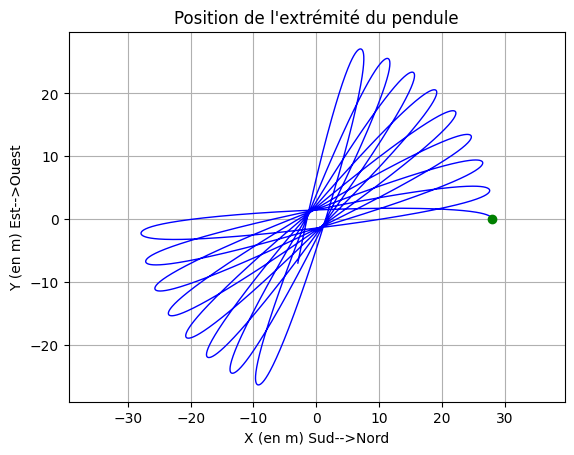

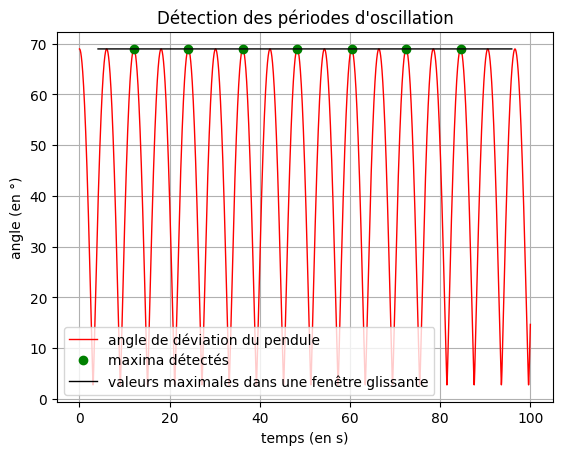

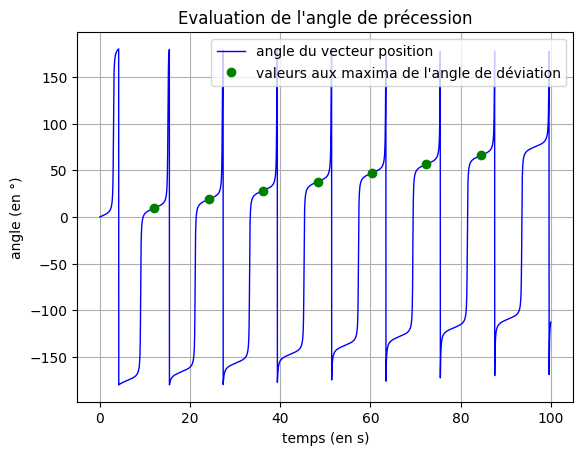

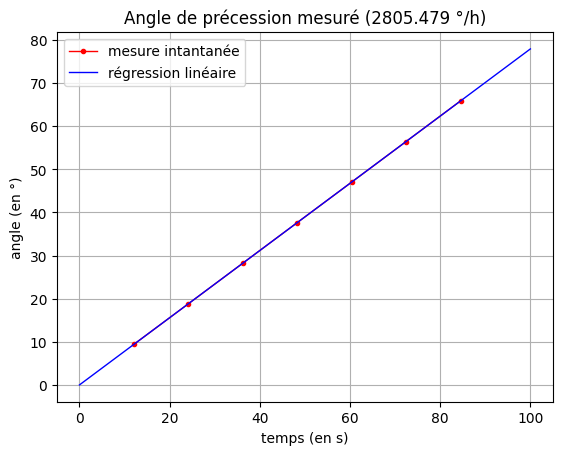

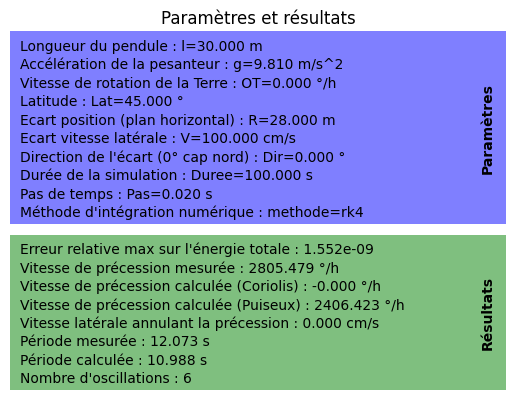

In [ ]:
pf_sim(l=30,g=9.81,OT=0,Lat=45,
    R=28,V=1,Dir=0,
    Duree=100,Pas=0.02,methode='rk4')

### Simulation dans des conditions réelles sur une durée d'une heure

début de la simulation numérique
fin de la simulation à 0:00:50.261810 (hh:mm:ss.ms)


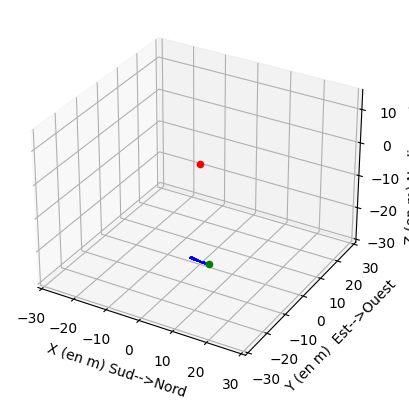

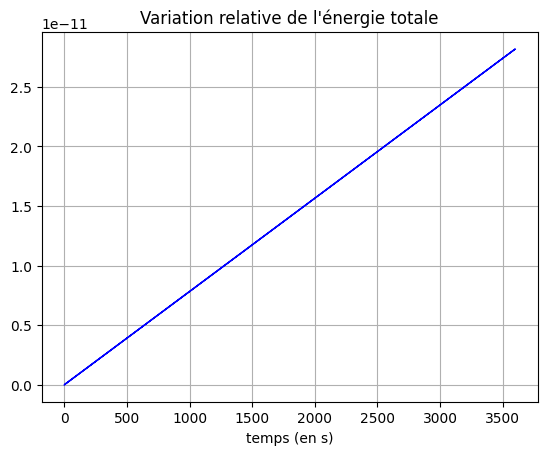

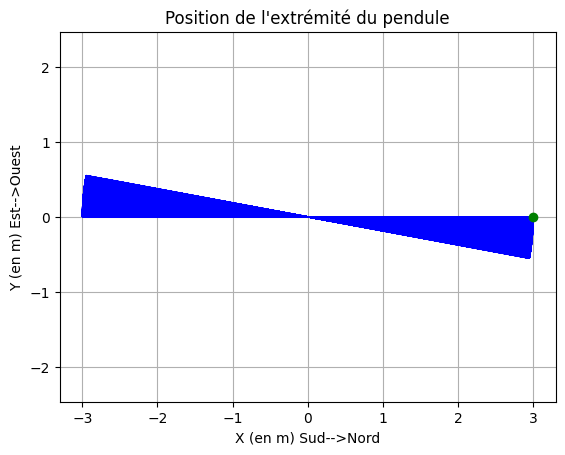

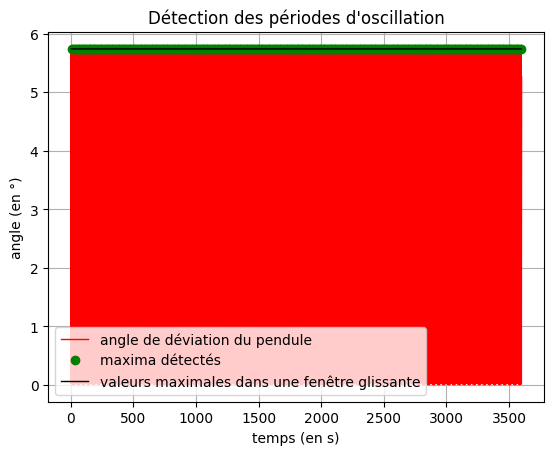

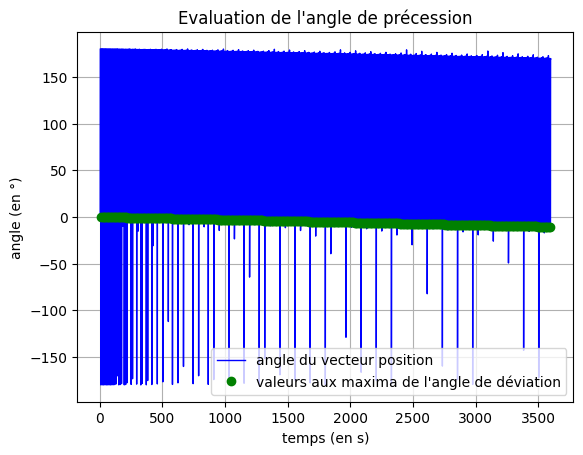

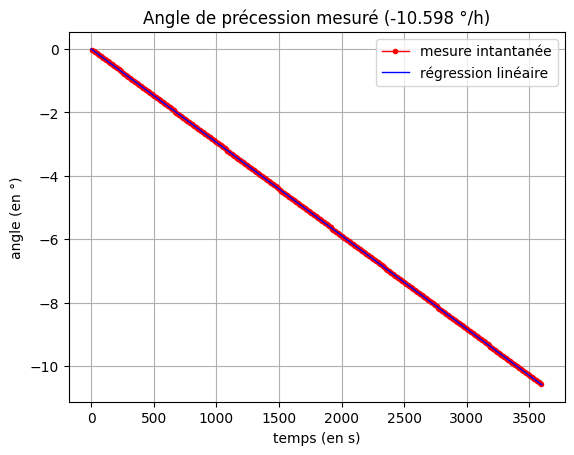

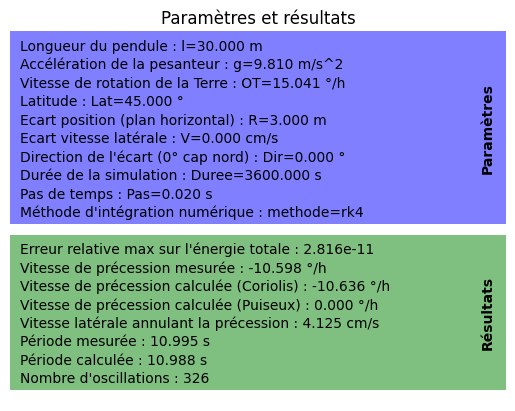

In [ ]:
pf_sim(l=30,g=9.81,OT=7.292115e-5,Lat=45,
    R=3,V=0,Dir=0,
    Duree=3600,Pas=0.02,methode='rk4')

### Simulation avec vitesse initiale annulant l'effet dû à la force de Coriolis

début de la simulation numérique
fin de la simulation à 0:00:54.711197 (hh:mm:ss.ms)


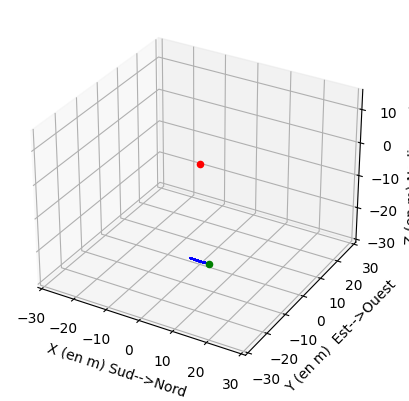

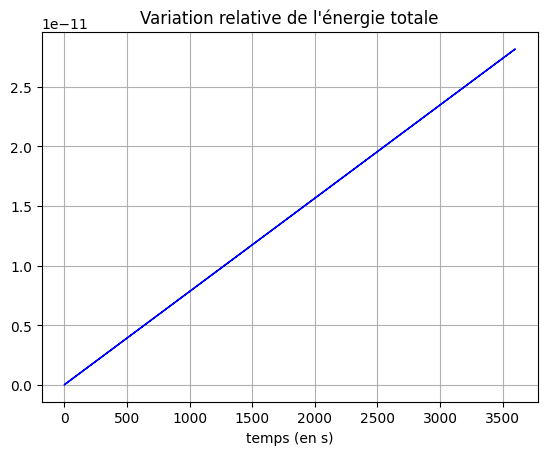

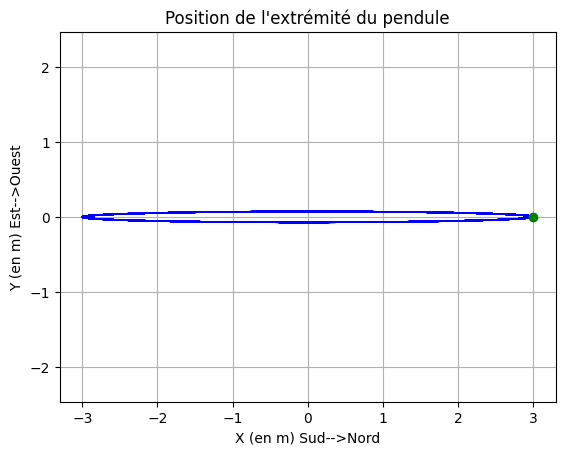

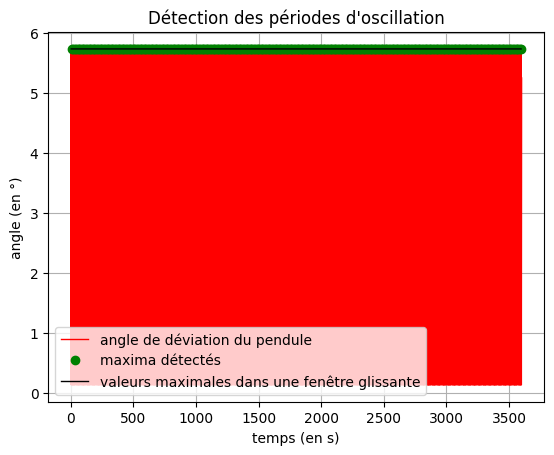

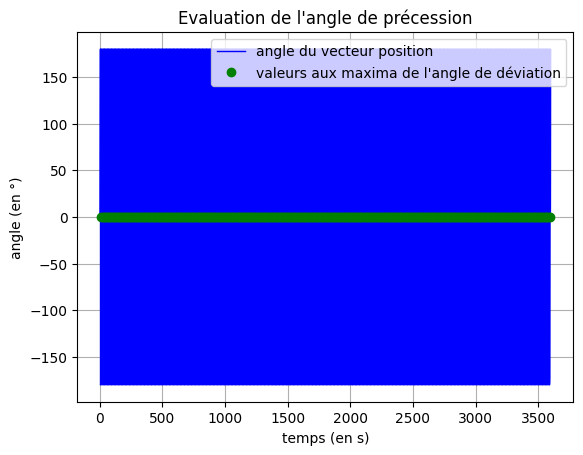

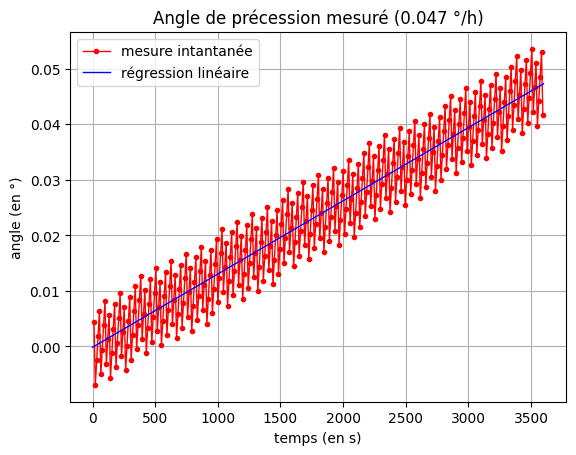

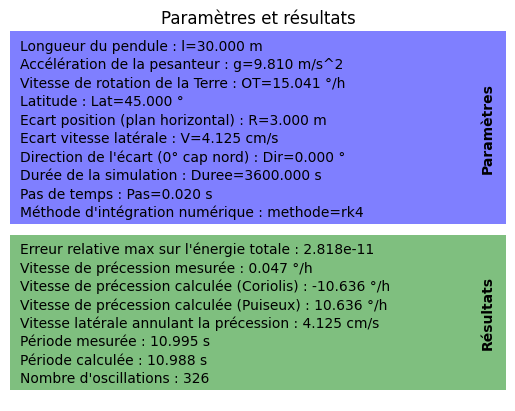

In [ ]:
pf_sim(l=30,g=9.81,OT=7.292115e-5,Lat=45,
    R=3,V=0.04125,Dir=0,
    Duree=3600,Pas=0.02,methode='rk4')